In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
from childes_mi.utils.paths import PHONBANK_DFS, DATA_DIR, FIGURE_DIR
from childes_mi.utils.general import flatten

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

In [26]:
phone_df = pd.read_pickle(PHONBANK_DFS/'phone_df_french.pickle')

In [27]:
phone_df['n_phones'] = [len(list(flatten(i))) for i in phone_df.phones.values]

In [28]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,011015,1.833,Yamaguchi,fra,male,"[[None], [None], [None], [None], [None], [None...","[[www], [www], [www], [www], [www], [www], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...,585
0,0,030015,3.000,Yamaguchi,fra,male,"[[None], [eta, eta, lela], [ø, nɔ̃, la], [aɖɔ̃...","[[www], [éteins, éteins, lumière], [euh, non, ...",/mnt/cube/tsainbur/Projects/github_repos/child...,1760
0,0,020112,2.083,Yamaguchi,fra,male,"[[None], [None], [nɔ], [nɔ̃], [nɑ̃], [nɔ̃], [N...","[[www], [www], [non], [non], [non], [non], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...,488


In [29]:
phone_df.dataset.unique()

array(['Yamaguchi', 'GoadRose', 'Hunkeler', 'KernFrench', 'Lyon', 'Paris'],
      dtype=object)

In [30]:
print("There are {} phones in this dataset".format(np.sum(phone_df.n_phones)))

There are 564678 phones in this dataset


In [31]:
import seaborn as sns
from childes_mi.utils.general import flatten,save_fig

## MI
- for each sequence, calculate the decay of a sequence as a function of distance between elements for that sequence indiividually
- Treat each phoneme as unique for that child, and compute MI across children

In [32]:
from childes_mi.information_theory import mutual_information as mi

In [33]:
distances = np.arange(1,101)

#### Run MI by age cohort

In [34]:
phone_df[:3]

,name,transcript_id,age,dataset,language,sex,phones,orthography,xml_loc,n_phones
0,0,011015,1.833,Yamaguchi,fra,male,"[[None], [None], [None], [None], [None], [None...","[[www], [www], [www], [www], [www], [www], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...,585
0,0,030015,3.000,Yamaguchi,fra,male,"[[None], [eta, eta, lela], [ø, nɔ̃, la], [aɖɔ̃...","[[www], [éteins, éteins, lumière], [euh, non, ...",/mnt/cube/tsainbur/Projects/github_repos/child...,1760
0,0,020112,2.083,Yamaguchi,fra,male,"[[None], [None], [nɔ], [nɔ̃], [nɑ̃], [nɔ̃], [N...","[[www], [www], [non], [non], [non], [non], [ww...",/mnt/cube/tsainbur/Projects/github_repos/child...,488


In [35]:
def quickplot_decay(distances, MI, shuff_MI, title=''):
    fig,axs = plt.subplots(ncols=2, figsize = (10,4))
    ax = axs[0]
    ax.set_title(title)
    ax.scatter(distances, MI-shuff_MI)
    ax.plot(distances, MI-shuff_MI, alpha = 0)
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax = axs[1]
    ax.scatter(distances, MI)
    ax.scatter(distances, shuff_MI)
    plt.show()

In [36]:
age_cohorts = [[0.5, 1], [1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

  0%|          | 0/6 [00:00<?, ?it/s]

0.5 1


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/2605 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 374 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1112 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 2605 out of 2605 | elapsed:    3.7s finished


  0%|          | 0/2605 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2328 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2605 out of 2605 | elapsed:    1.7s finished


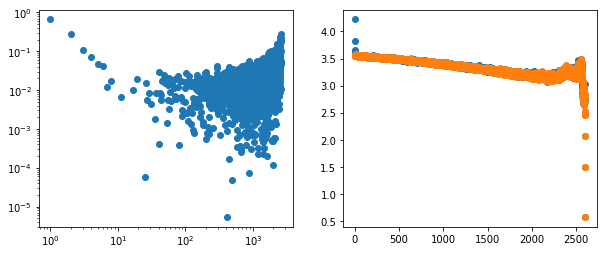

/home/AD/tsainbur/anaconda3/envs/childes-paper/lib/python3.7/site-packages/pandas/core/dtypes/cast.py:869: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


  0%|          | 0/1856 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1856 out of 1856 | elapsed:    1.5s finished


  0%|          | 0/1856 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1856 out of 1856 | elapsed:    0.9s finished


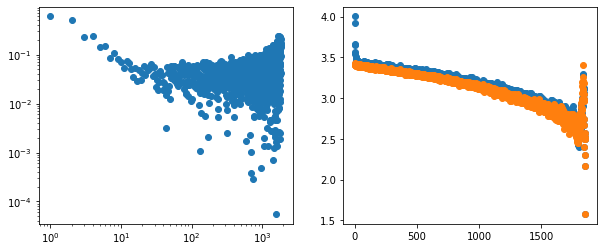

  0%|          | 0/2403 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2403 out of 2403 | elapsed:    1.9s finished


  0%|          | 0/2403 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2403 out of 2403 | elapsed:    1.8s finished


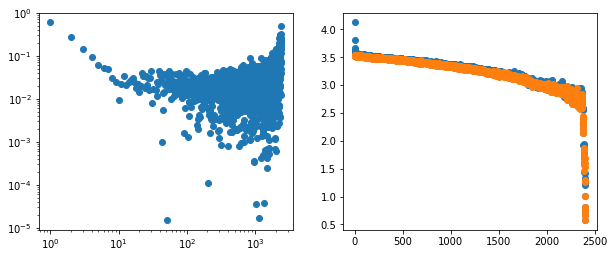

  0%|          | 0/1284 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1284 out of 1284 | elapsed:    0.9s finished


  0%|          | 0/1284 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1284 out of 1284 | elapsed:    0.9s finished


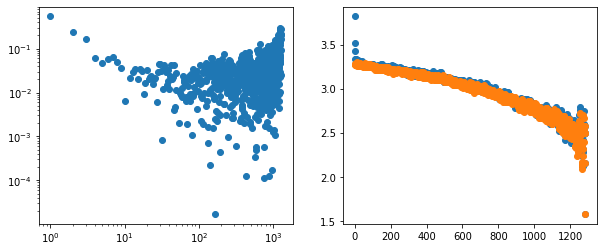

  0%|          | 0/1961 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1961 out of 1961 | elapsed:    1.6s finished


  0%|          | 0/1961 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1961 out of 1961 | elapsed:    1.1s finished


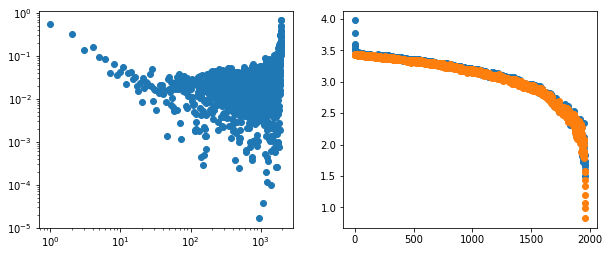

  0%|          | 0/1204 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1033 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1204 out of 1204 | elapsed:    1.3s finished


  0%|          | 0/1204 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 316 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1204 out of 1204 | elapsed:    0.7s finished


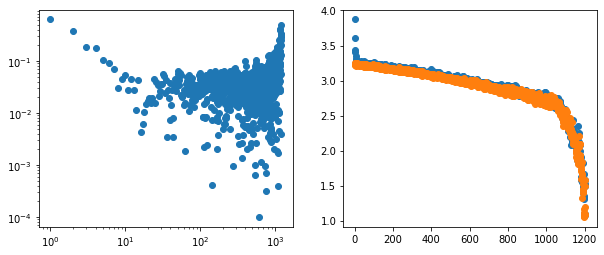

  0%|          | 0/659 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 564 out of 659 | elapsed:    0.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 659 out of 659 | elapsed:    0.7s finished


  0%|          | 0/659 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 564 out of 659 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 659 out of 659 | elapsed:    0.7s finished


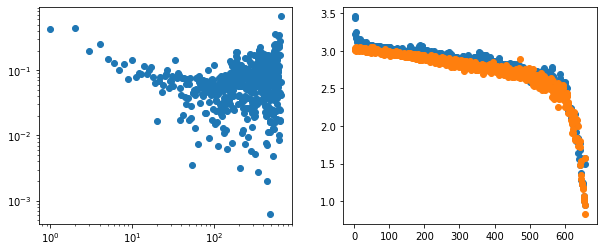

  0%|          | 0/1053 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1053 out of 1053 | elapsed:    1.3s finished


  0%|          | 0/1053 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 741 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1053 out of 1053 | elapsed:    1.1s finished


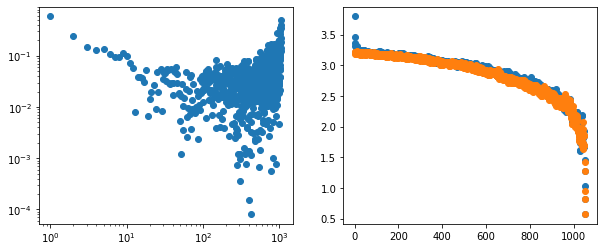

  0%|          | 0/1429 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1429 out of 1429 | elapsed:    1.3s finished


  0%|          | 0/1429 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1429 out of 1429 | elapsed:    1.1s finished


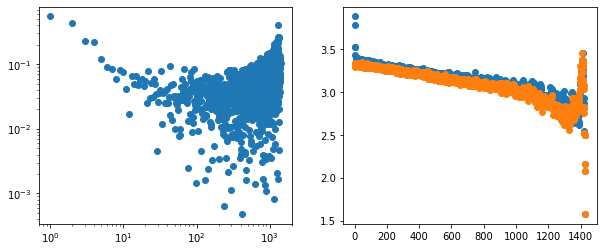

  0%|          | 0/632 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 632 out of 632 | elapsed:    0.8s finished


  0%|          | 0/632 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 632 out of 632 | elapsed:    0.7s finished


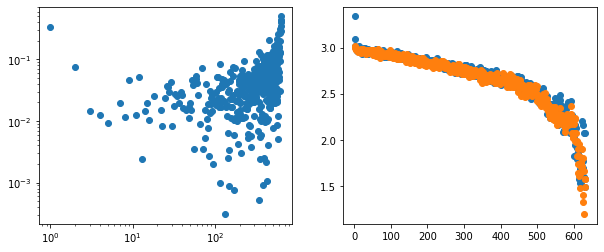

1 1.5


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/3301 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3301 out of 3301 | elapsed:    2.4s finished


  0%|          | 0/3301 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3189 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 3301 out of 3301 | elapsed:    1.9s finished


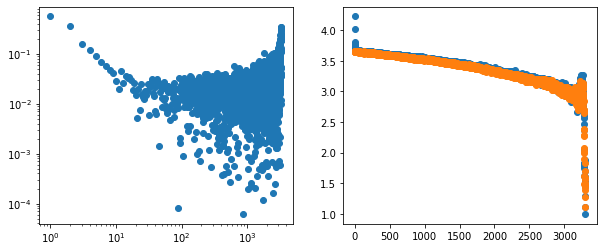

  0%|          | 0/2446 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2182 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2446 out of 2446 | elapsed:    1.7s finished


  0%|          | 0/2446 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1644 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2229 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2446 out of 2446 | elapsed:    2.1s finished


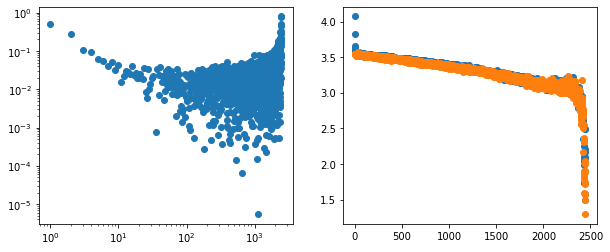

  0%|          | 0/1577 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1577 out of 1577 | elapsed:    1.4s finished


  0%|          | 0/1577 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1577 out of 1577 | elapsed:    1.1s finished


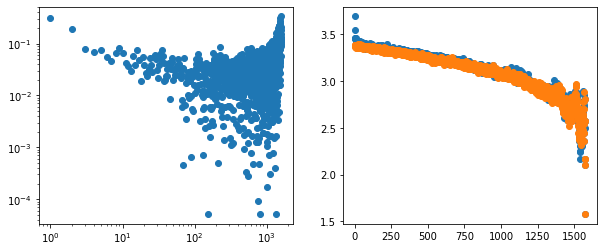

  0%|          | 0/1621 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1621 out of 1621 | elapsed:    1.3s finished


  0%|          | 0/1621 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1464 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1621 out of 1621 | elapsed:    1.5s finished


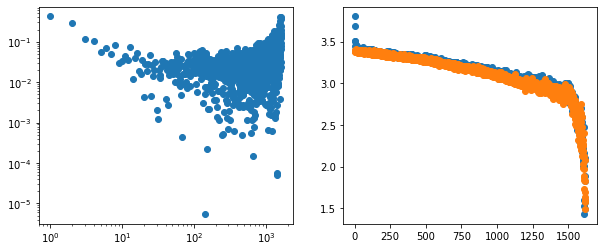

  0%|          | 0/1067 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 848 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1067 out of 1067 | elapsed:    1.0s finished


  0%|          | 0/1067 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1067 out of 1067 | elapsed:    0.6s finished


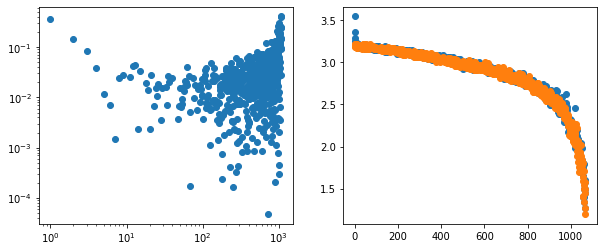

  0%|          | 0/2134 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2134 out of 2134 | elapsed:    1.2s finished


  0%|          | 0/2134 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 648 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1440 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2134 out of 2134 | elapsed:    1.6s finished


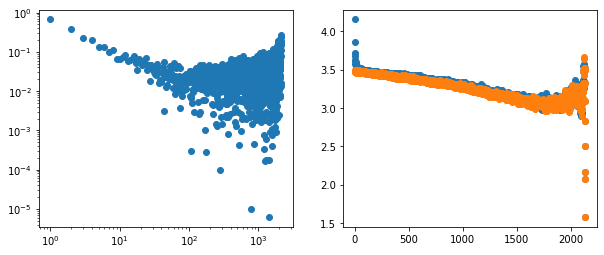

  0%|          | 0/2362 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1240 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2362 out of 2362 | elapsed:    1.0s finished


  0%|          | 0/2362 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2362 out of 2362 | elapsed:    1.2s finished


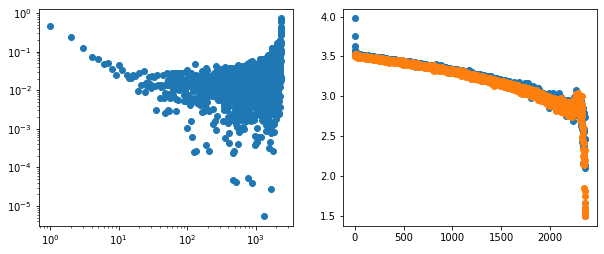

  0%|          | 0/1491 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1320 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1491 out of 1491 | elapsed:    1.4s finished


  0%|          | 0/1491 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1323 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1491 out of 1491 | elapsed:    1.3s finished


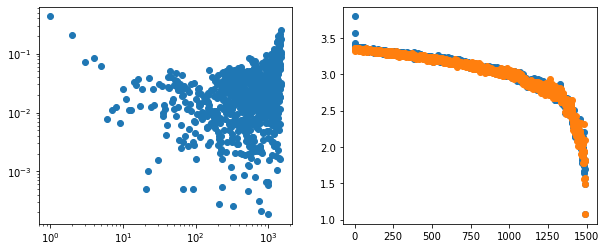

  0%|          | 0/1742 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1416 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 1742 out of 1742 | elapsed:    2.5s finished


  0%|          | 0/1742 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1742 out of 1742 | elapsed:    1.1s finished


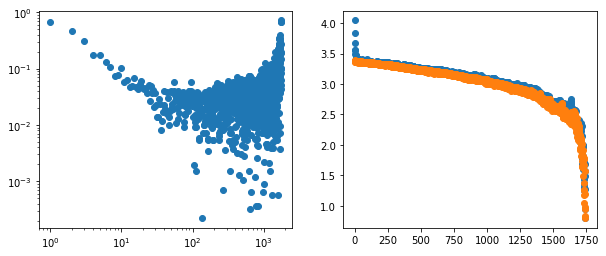

  0%|          | 0/1301 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 520 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 916 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1206 out of 1301 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1301 out of 1301 | elapsed:    1.1s finished


  0%|          | 0/1301 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1301 out of 1301 | elapsed:    1.0s finished


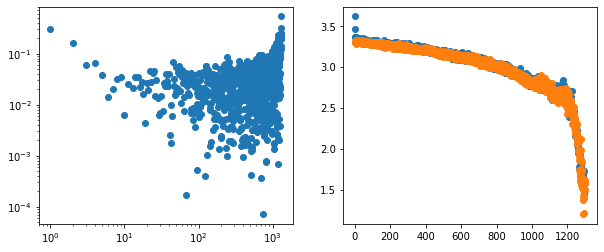

1.5 2


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/4408 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4313 out of 4408 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4408 out of 4408 | elapsed:    2.9s finished


  0%|          | 0/4408 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 918 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1386 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 1926 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2538 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 3222 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 3978 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 4408 out of 4408 | elapsed:    4.8s finished


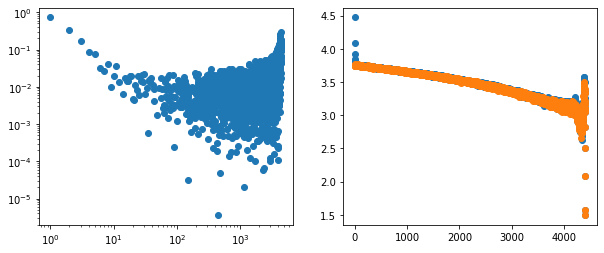

  0%|          | 0/4001 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3861 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 4001 out of 4001 | elapsed:    1.9s finished


  0%|          | 0/4001 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1540 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4001 out of 4001 | elapsed:    2.7s finished


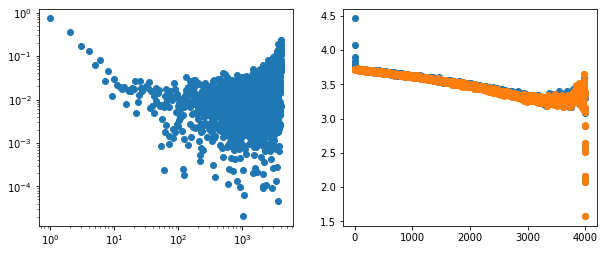

  0%|          | 0/4433 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1152 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2544 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4433 out of 4433 | elapsed:    2.5s finished


  0%|          | 0/4433 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1216 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2800 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4196 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4433 out of 4433 | elapsed:    2.3s finished


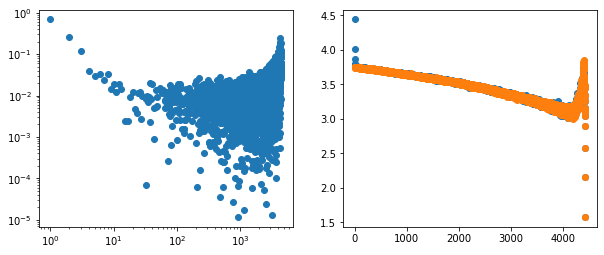

  0%|          | 0/3122 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2946 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3122 out of 3122 | elapsed:    2.1s finished


  0%|          | 0/3122 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1448 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2384 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3026 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 3122 out of 3122 | elapsed:    2.5s finished


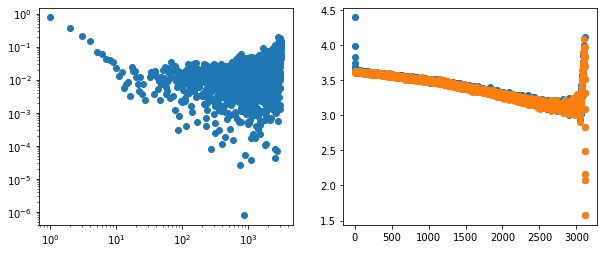

  0%|          | 0/2924 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2924 out of 2924 | elapsed:    1.4s finished


  0%|          | 0/2924 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1736 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2672 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2924 out of 2924 | elapsed:    2.1s finished


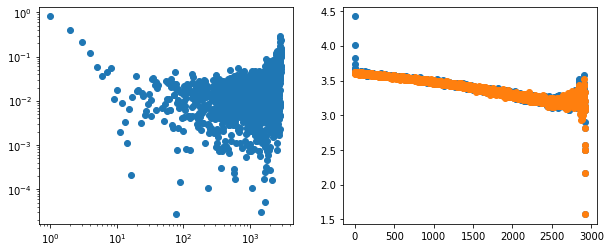

  0%|          | 0/3681 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3681 out of 3681 | elapsed:    2.6s finished


  0%|          | 0/3681 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 524 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 920 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1388 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1928 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2540 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 3224 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 3586 out of 3681 | elapsed:    3.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3681 out of 3681 | elapsed:    3.4s finished


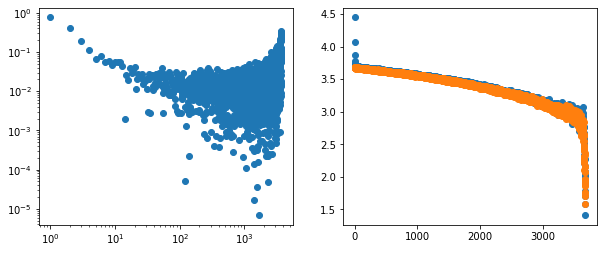

  0%|          | 0/2520 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2328 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    1.4s finished


  0%|          | 0/2520 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2000 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2520 out of 2520 | elapsed:    2.2s finished


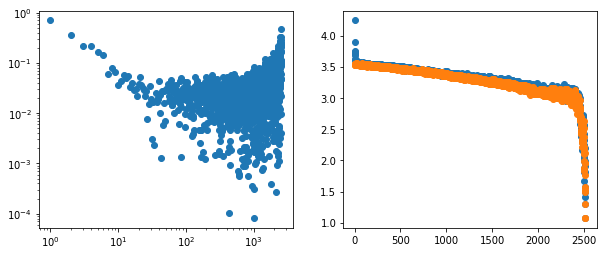

  0%|          | 0/3604 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2736 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3285 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 3604 out of 3604 | elapsed:    2.0s finished


  0%|          | 0/3604 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3604 out of 3604 | elapsed:    2.7s finished


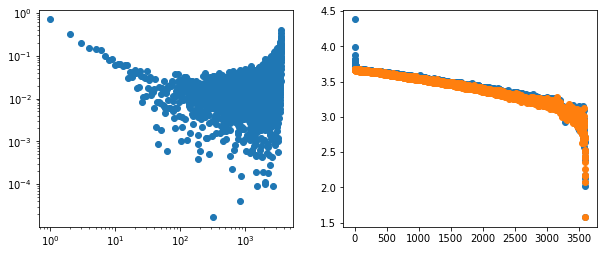

  0%|          | 0/2510 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2510 out of 2510 | elapsed:    2.1s finished


  0%|          | 0/2510 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2510 out of 2510 | elapsed:    1.4s finished


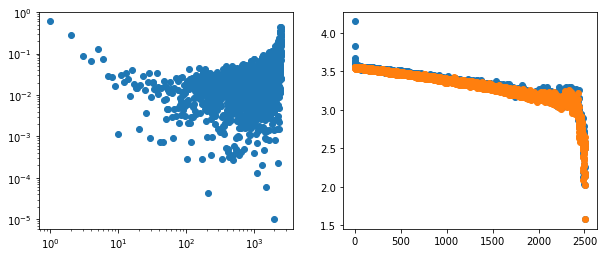

  0%|          | 0/3596 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 3596 out of 3596 | elapsed:    2.8s finished


  0%|          | 0/3596 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3596 out of 3596 | elapsed:    2.6s finished


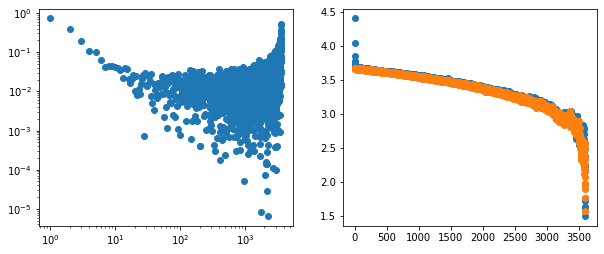

2 2.5


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/7629 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2816 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4688 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6848 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7629 out of 7629 | elapsed:    2.9s finished


  0%|          | 0/7629 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2184 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3264 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5712 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 7629 out of 7629 | elapsed:    4.1s finished


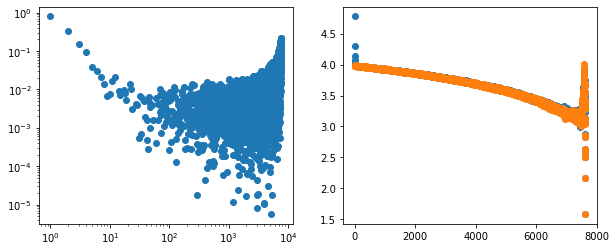

  0%|          | 0/7393 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2512 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4384 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6544 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 7393 out of 7393 | elapsed:    2.8s finished


  0%|          | 0/7393 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 6816 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 7393 out of 7393 | elapsed:    3.4s finished


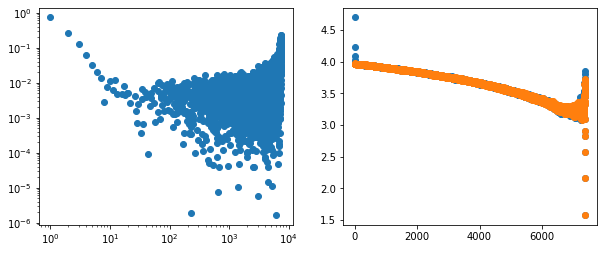

  0%|          | 0/5851 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2592 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3816 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5496 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5851 out of 5851 | elapsed:    4.4s finished


  0%|          | 0/5851 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1408 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1948 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3244 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4000 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 4828 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 5756 out of 5851 | elapsed:    6.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 5851 out of 5851 | elapsed:    6.7s finished


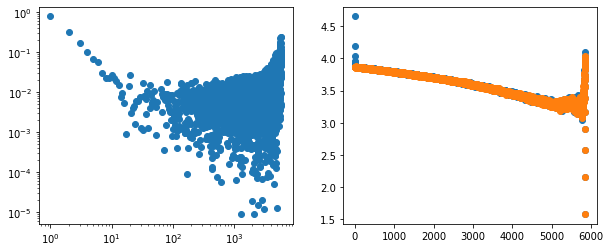

  0%|          | 0/5395 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 844 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2572 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4232 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 5395 out of 5395 | elapsed:    3.0s finished


  0%|          | 0/5395 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2856 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 5395 out of 5395 | elapsed:    4.5s finished


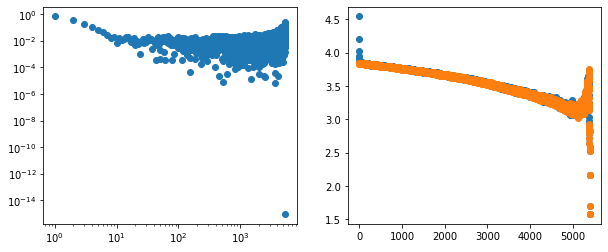

  0%|          | 0/4912 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  73 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 302 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 626 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1022 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1636 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2716 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4232 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 4912 out of 4912 | elapsed:    3.7s finished


  0%|          | 0/4912 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4912 out of 4912 | elapsed:    3.1s finished


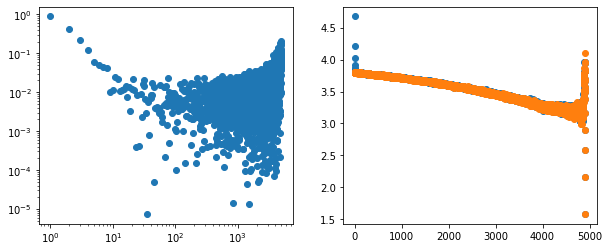

  0%|          | 0/4771 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 4771 out of 4771 | elapsed:    2.4s finished


  0%|          | 0/4771 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1704 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4676 out of 4771 | elapsed:    3.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4771 out of 4771 | elapsed:    3.8s finished


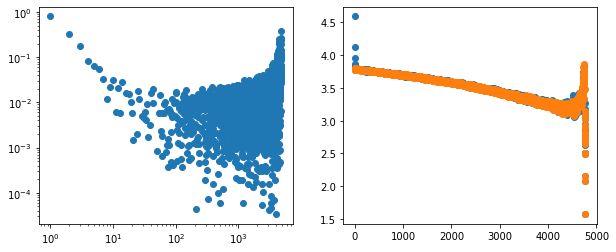

  0%|          | 0/5005 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5005 out of 5005 | elapsed:    3.9s finished


  0%|          | 0/5005 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 748 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1640 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3512 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4657 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5005 out of 5005 | elapsed:    2.7s finished


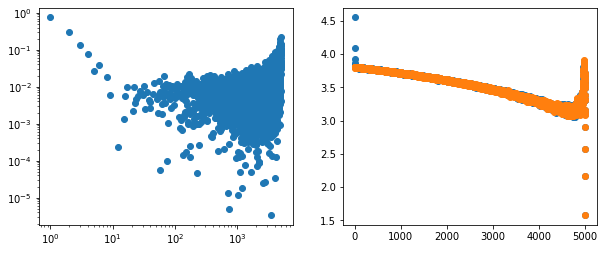

  0%|          | 0/4597 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2664 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4032 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 4597 out of 4597 | elapsed:    4.5s finished


  0%|          | 0/4597 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 4597 out of 4597 | elapsed:    3.3s finished


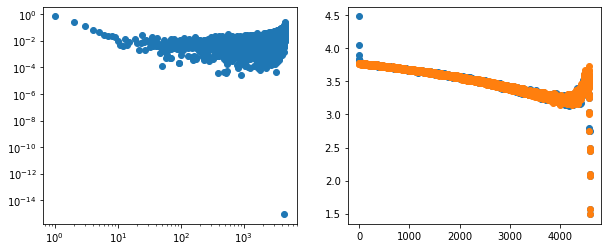

  0%|          | 0/4073 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  67 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 290 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 614 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1348 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2552 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 4073 out of 4073 | elapsed:    2.3s finished


  0%|          | 0/4073 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 214 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 1580 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 2516 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 3596 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 3978 out of 4073 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4073 out of 4073 | elapsed:    2.6s finished


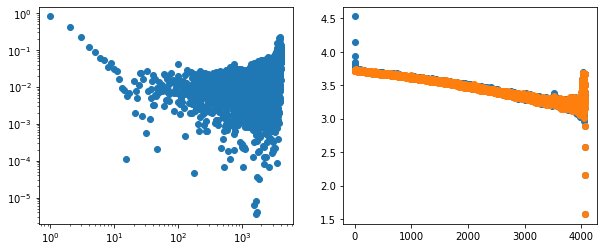

  0%|          | 0/4195 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2304 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4050 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 4195 out of 4195 | elapsed:    3.1s finished


  0%|          | 0/4195 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3504 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 4195 out of 4195 | elapsed:    2.4s finished


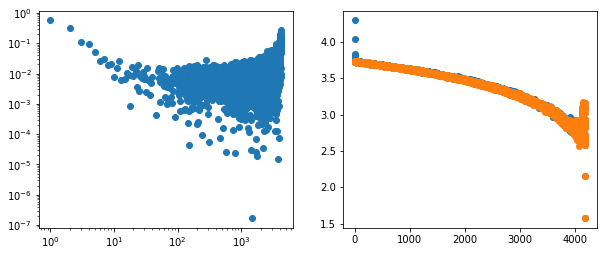

2.5 3


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9889 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7752 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 9408 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 9889 out of 9889 | elapsed:    6.2s finished


  0%|          | 0/9889 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2288 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3368 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4592 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 5960 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7472 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 9128 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 9889 out of 9889 | elapsed:    6.7s finished


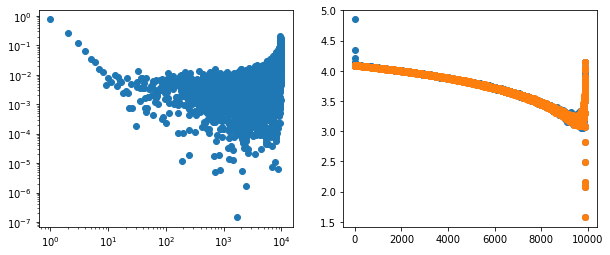

  0%|          | 0/7484 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 930 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1398 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1938 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2550 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 3234 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3990 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 4818 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 5718 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 6690 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 7484 out of 7484 | elapsed:    7.4s finished


  0%|          | 0/7484 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6528 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7484 out of 7484 | elapsed:    3.2s finished


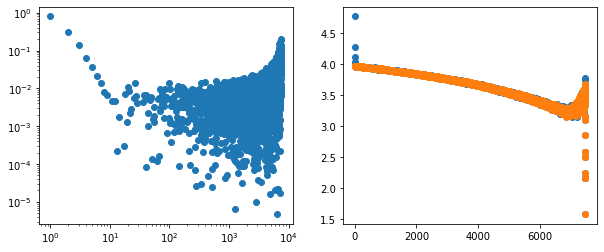

  0%|          | 0/8296 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3072 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4296 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5664 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 8082 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 8296 out of 8296 | elapsed:    5.3s finished


  0%|          | 0/8296 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2112 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 3984 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6144 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 8130 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 8296 out of 8296 | elapsed:    3.6s finished


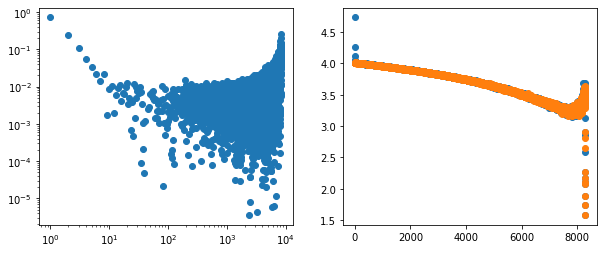

  0%|          | 0/7434 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1824 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3696 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 7434 out of 7434 | elapsed:    3.3s finished


  0%|          | 0/7434 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1012 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1520 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 2600 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4096 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6832 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 7434 out of 7434 | elapsed:    4.3s finished


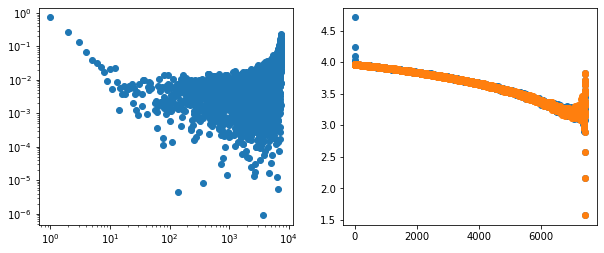

  0%|          | 0/7210 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 760 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2488 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3568 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 5648 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 7210 out of 7210 | elapsed:    4.9s finished


  0%|          | 0/7210 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4872 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 7210 out of 7210 | elapsed:    4.8s finished


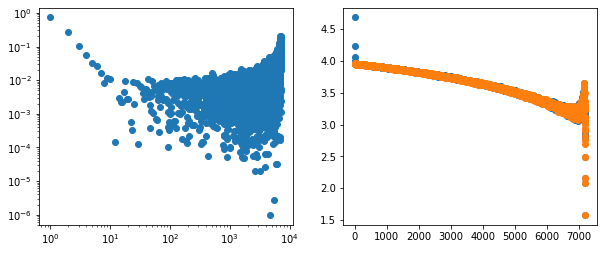

  0%|          | 0/6093 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 1040 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 2624 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 4496 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 5584 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 5890 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6093 out of 6093 | elapsed:    3.7s finished


  0%|          | 0/6093 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 5856 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 6093 out of 6093 | elapsed:    3.2s finished


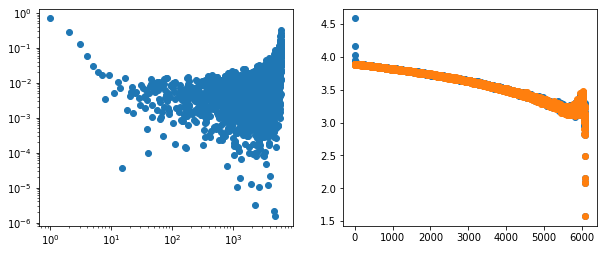

  0%|          | 0/6480 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 912 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 2496 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4368 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 6192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    2.9s finished


  0%|          | 0/6480 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1800 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2880 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4176 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed:    4.3s finished


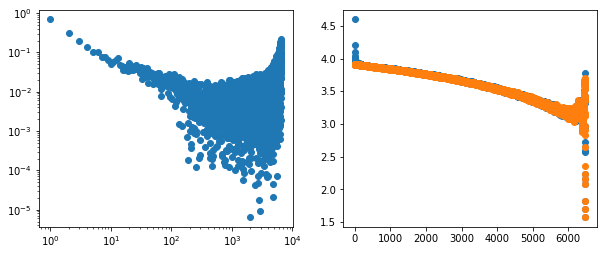

  0%|          | 0/6026 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1512 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2592 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3816 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5184 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 6026 out of 6026 | elapsed:    4.7s finished


  0%|          | 0/6026 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2136 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4008 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5907 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 6026 out of 6026 | elapsed:    2.6s finished


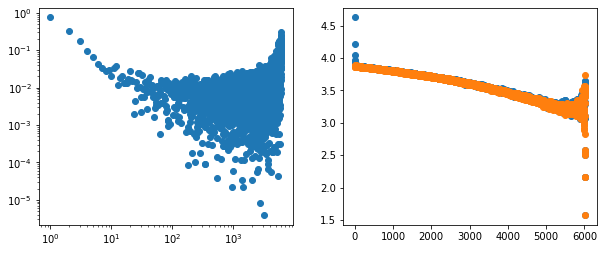

  0%|          | 0/4527 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 4432 out of 4527 | elapsed:    4.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 4527 out of 4527 | elapsed:    4.5s finished


  0%|          | 0/4527 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 4527 out of 4527 | elapsed:    2.9s finished


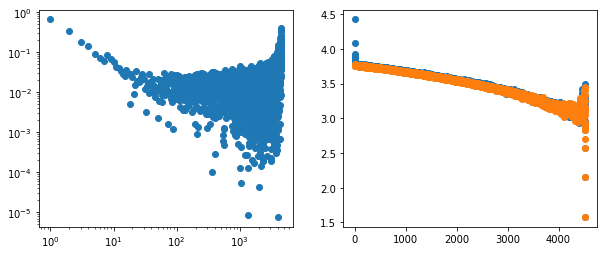

  0%|          | 0/4808 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 292 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2096 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 4532 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4808 out of 4808 | elapsed:    3.7s finished


  0%|          | 0/4808 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2808 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 4533 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 4808 out of 4808 | elapsed:    2.3s finished


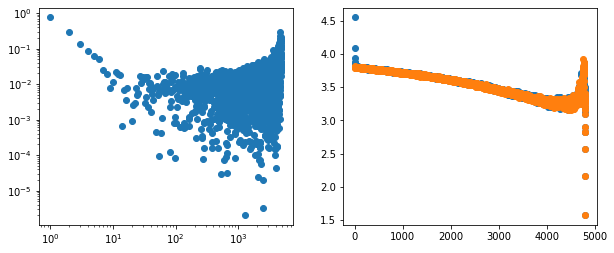

3 20


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/12459 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1992 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3456 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5904 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8640 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 11664 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 12459 out of 12459 | elapsed:    6.9s finished


  0%|          | 0/12459 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 3216 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 5376 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7824 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 10560 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 12459 out of 12459 | elapsed:    5.0s finished


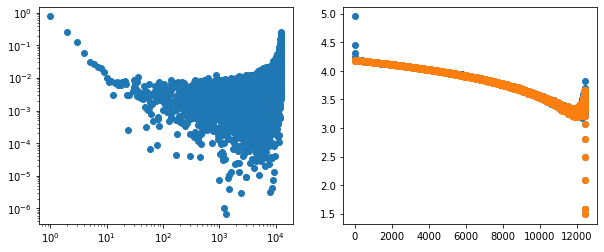

  0%|          | 0/11850 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 322 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 1048 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 3728 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 7472 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 11432 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11850 out of 11850 | elapsed:    4.1s finished


  0%|          | 0/11850 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1752 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2688 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 3768 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 6240 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 11262 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 11640 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 11850 out of 11850 | elapsed:    5.3s finished


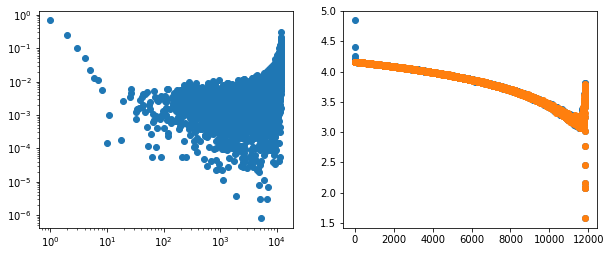

  0%|          | 0/11233 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 5424 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8160 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 10818 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 11233 out of 11233 | elapsed:    5.9s finished


  0%|          | 0/11233 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5904 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 8640 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 10962 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 11233 out of 11233 | elapsed:    5.8s finished


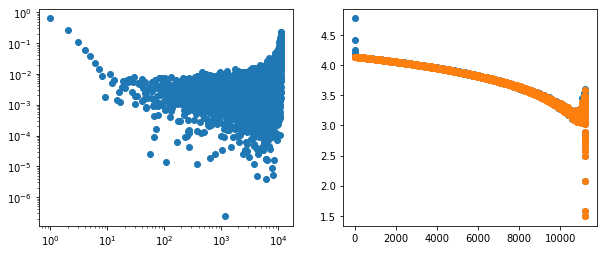

  0%|          | 0/9213 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1896 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 4200 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 5568 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 7920 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 9213 out of 9213 | elapsed:    5.7s finished


  0%|          | 0/9213 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2856 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 4224 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 5736 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 7776 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 9213 out of 9213 | elapsed:    6.7s finished


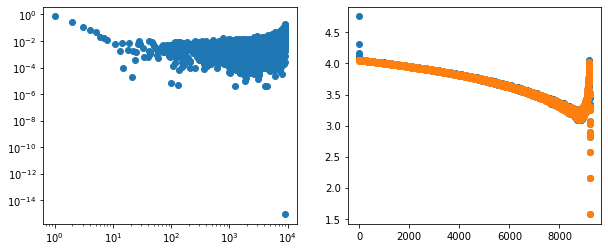

  0%|          | 0/10427 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1632 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 3648 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 5520 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 8256 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 10427 out of 10427 | elapsed:    5.2s finished


  0%|          | 0/10427 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 2784 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 4656 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 6816 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 9264 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 10427 out of 10427 | elapsed:    5.2s finished


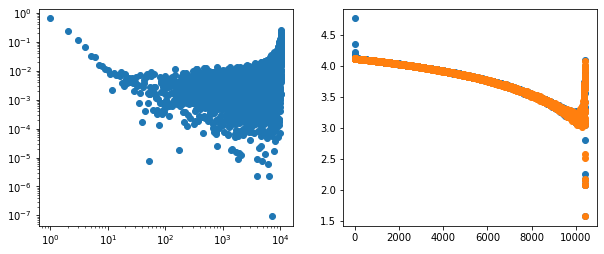

  0%|          | 0/10210 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 744 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2472 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5040 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 7776 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 10002 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 10210 out of 10210 | elapsed:    5.3s finished


  0%|          | 0/10210 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 612 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 1008 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 1476 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2628 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 3936 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 5448 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 7104 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 9552 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 10210 out of 10210 | elapsed:    7.2s finished


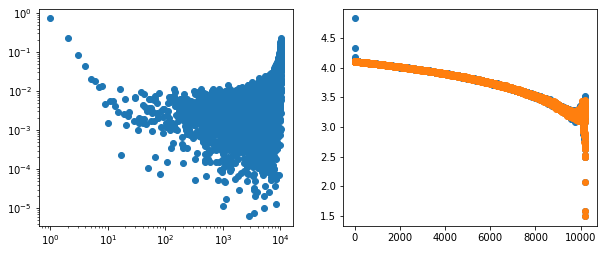

In [37]:
nex = 10

MI_DF_long = pd.DataFrame(
    columns=[
        "MI",
        "MI_var",
        "shuff_MI",
        "shuff_MI_var",
        "distances",
        "age_cohort_low",
        "age_cohort_high",
        "n_phones",
        "n_unique_phones",
        "age",
        "dataset",
        "xml_loc",
        "n_phones",  
        "phones_list"
        
    ]
)
    # for each age cohort
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):# [::-1]
    cohort_subset = phone_df[
        (phone_df.age > age_cohort_low) & (phone_df.age <= age_cohort_high)
    ]
    print(age_cohort_low, age_cohort_high)
    for idx, longest_row in tqdm(cohort_subset.sort_values(by='n_phones', ascending=False)[:nex].iterrows(), total=nex):
        phones_list = ''.join(flatten([i for i in flatten(longest_row.phones) if i is not None]))
    

        n_phones = len(phones_list)
        
        if n_phones < 100:
            continue
        
        n_unique_phones = len(np.unique(phones_list))
        
        distances = np.arange(1, n_phones - 1)
        (MI, MI_var), (shuff_MI, shuff_MI_var) = mi.sequential_mutual_information([list(phones_list)],  
                                                                                  distances = distances, n_jobs=-1)
                
        quickplot_decay(distances, MI, shuff_MI, title='')
        
        MI_DF_long.loc[len(MI_DF_long)] = [
            MI,
            MI_var,
            shuff_MI,
            shuff_MI_var,
            distances,
            age_cohort_low,
            age_cohort_high,
            n_phones,
            n_unique_phones,
            longest_row.age,
            longest_row.dataset,
            longest_row.xml_loc,
            longest_row.n_phones,
            phones_list
            
        ]

In [38]:
MI_DF_long.to_pickle(DATA_DIR / "mi" / "phonbank_longest_seqs-french.pickle")